In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import os
import pickle

from scipy.stats import pearsonr as pr
from scipy.stats import spearmanr as sr
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as MSE

from scipy.stats import ttest_ind

In [2]:
r2_scores, rmses = {},{}

#### load TL1,6,scratch scores

In [3]:
def load_TL16scratch():
    results = pickle.load(open('../../results/tm_Jarzab_models/TL16_scratch_results.pkl','rb'))
    for file, item in results.items():
        name = file.split('/')[-2]
        if name == 'TL6_RES1_ogt_onehot_SameAnces': name = 'Type1-TL6'
        if name == 'TL1_RES1_ogt_onehot_SameAnces': name = 'Type1-TL1'
        if name == 'Tm_Scratch': name = 'Type1-scratch'
        
        r2_scores[name] = r2_scores.get(name,[]) + [item[0]]
        rmses[name] = rmses.get(name,[]) + [item[1]]
    print(r2_scores)
    print(rmses)

In [4]:
load_TL16scratch()

{'Type1-TL6': [0.5073633433816283, 0.48453283111953815, 0.5031952445778425, 0.48592762871595996, 0.4970413078879543, 0.48986592579319044, 0.49765504695824647, 0.49539998902983573, 0.49369575332232707, 0.49277187089551333], 'Type1-TL1': [0.5663844024448922, 0.5708606544839717, 0.5767582987745026], 'Type1-scratch': [0.05602734425110567, 0.47192738006164625, 0.5103816273170791, 0.4827473936017864, 0.4666449864431802, 0.47996847622288275, 0.48012455013078026, 0.47444455781789996, 0.5047369732550041, 0.4956354342108885]}
{'Type1-TL6': [6.754497987563353, 6.909239055488652, 6.783012020286962, 6.899884902009742, 6.8248934183300785, 6.873404154509196, 6.820728083868675, 6.836020278768403, 6.847554532973785, 6.85379924844327], 'Type1-TL1': [6.336977460920064, 6.304184020490685, 6.260715085638373], 'Type1-scratch': [9.3499528678987, 6.9932095136003065, 6.733774483481733, 6.9211945704917515, 7.028099566337366, 6.9397615763477996, 6.938720103918719, 6.976522245348491, 6.7724790192851305, 6.8344252

In [7]:
ttest_ind(r2_scores['Type1-TL6'],r2_scores['Type1-TL1'])

Ttest_indResult(statistic=-17.09085578300824, pvalue=2.864980073841856e-09)

In [5]:
r2_scores['Type1-TL1']

[0.5663844024448922, 0.5708606544839717, 0.5767582987745026]

In [6]:
r2_scores['Type1-scratch']

[0.05602734425110567,
 0.47192738006164625,
 0.5103816273170791,
 0.4827473936017864,
 0.4666449864431802,
 0.47996847622288275,
 0.48012455013078026,
 0.47444455781789996,
 0.5047369732550041,
 0.4956354342108885]

In [11]:
(np.max(r2_scores['Type1-TL1'])-np.max(r2_scores['Type1-scratch']))/np.max(r2_scores['Type1-scratch'])

0.13005301896611246

In [9]:
ttest_ind(r2_scores['Type1-TL1'],r2_scores['Type1-scratch'][1:])

Ttest_indResult(statistic=9.440061722084383, pvalue=2.6885498843480474e-06)

#### load classical model results

def load_classical_models():
    def _find_best(df):
        ind = df.index[np.argsort(df['val_r2'])][-1]
        return df.loc[ind,'test_r2']
    
    df1 = pd.read_csv('../../results/tm_Leuenberger_models/ClassicalModels/tm_iFeatures_score.csv',index_col=0)
    df2 = pd.read_csv('../../results/tm_Leuenberger_models/ClassicalModels/tm_unirep_score.csv',index_col=0)
    
    tms = [float(line.split()[-1]) for line in open('../../data/tm_Leuenberger/cleaned_enzyme_tms_v1_test.fasta') if line.startswith('>')]
    
    r2_scores['iFeatures'] = [_find_best(df1)]
    r2_scores['UniRep'] = [_find_best(df2)]
    
    rmses['iFeatures'] = [np.sqrt((1-_find_best(df1))*np.var(tms))]
    rmses['UniRep'] = [np.sqrt((1-_find_best(df2))*np.var(tms))]
    
    print(r2_scores)
    print(rmses)

load_classical_models()

#### Compare performance of different models

In [11]:
data_frozen_all = pickle.load(open('../../results/tm_Jarzab_models/TL_RES1_fronzen_all_layers.pkl','rb'))

In [12]:
xticks = [
  'iFeatures',
  'UniRep',
  'From Scratch',
  'FrozenAll',
  'FrozenCNN',
  'TuneAll']

r2s = [
    [np.nan],
    [np.nan],
    r2_scores['Type1-scratch'],
    [data_frozen_all['r2_score']],
    r2_scores['Type1-TL6'],
    r2_scores['Type1-TL1'],
]
rmses = []
for lst in r2s:
    new_lst = [np.sqrt((1-r2)*np.var(data_frozen_all['true_topt'])) if ~np.isnan(r2) else np.nan for r2 in lst]
    rmses.append(new_lst)

In [13]:
print(rmses)

[[nan], [nan], [9.349952867886604, 6.993209513591259, 6.73377448347302, 6.921194570482797, 7.028099566328273, 6.93976157633882, 6.938720103909742, 6.976522245339465, 6.772479019276369, 6.834425257168992], [22.223883878455585], [6.754497987554614, 6.909239055479713, 6.783012020278186, 6.899884902000815, 6.824893418321249, 6.873404154500303, 6.82072808385985, 6.836020278759559, 6.847554532964926, 6.853799248434403], [6.336977460911865, 6.304184020482529, 6.260715085630274]]


In [14]:
def do_plot(data,ylabel,outname=None,ylim=None,metric=np.mean):
    plt.figure(figsize=(3,2.9))
    pos = np.arange(len(data))
    #cs = ['#fc8d59' if 'Type2' in str(tick) else '#1f78b4'for tick in xticks]
    plt.bar(pos,[0 if np.isnan(item[0]) else metric(item) for item in data],zorder=0,color='#1b9e77')
    for i,lst in enumerate(data):
        if np.isnan(lst[0]): plt.text(i,ylim[0]+0.01,'NA',ha='center',va='bottom')
        else:
            if metric(lst)<0: plt.text(i,ylim[0]+0.01,'{:.2f}'.format(metric(lst)),ha='center',va='bottom')
            plt.scatter(np.array([pos[i]]*len(lst))+np.random.normal(0,0.1,size=len(lst)),lst,color='k',s=6)
        
    plt.xticks(pos,xticks,rotation=45,ha='right')
    #plt.xticks(pos)
    #plt.xlabel('Types')
    plt.ylabel(ylabel)
    plt.xlim()
    if ylim is not None: plt.ylim(ylim)
    
    plt.tight_layout()
    if outname is not None: plt.savefig(outname,bbox_inches='tight',transparent=True)
    plt.show()

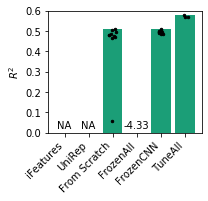

In [16]:
do_plot(r2s,'$R^2$','../../results/figures/tm__Jarzab_r2_scores_different_models.pdf',ylim=[0.,0.6],metric=np.max)

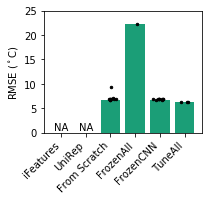

In [17]:
do_plot(rmses,'RMSE ($^\circ$C)','../../results/figures/tm_Jarzab_rmse_different_models.pdf',ylim=[0,25],metric=np.min)

#### Plot best model

In [12]:
data = pickle.load(open('../../results/tm_Jarzab_models/TL16_scratch_results.pkl','rb'))
# (r2_score, rmse, ytrue,yp)

In [13]:
best_r2 = -np.inf
for name,item in data.items():
    if 'RES1' not in name: continue
    if item[0]>best_r2: 
        best_r2 = item[0]
        best_yp = item[3]
        best_name = name
        ytrue = item[2]
print(best_name,best_r2)

../../results/tm_Jarzab_models/TL1_RES1_ogt_onehot_SameAnces/bestmodel2.h5 0.5767582987745026


4173
pr: (array([0.76057643]), array([0.]))
sr: SpearmanrResult(correlation=0.5482047414079826, pvalue=0.0)
r2: 0.5767582987734075
rmse: 6.260715085638373


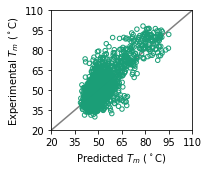

In [88]:
plt.figure(figsize=(3.,2.5))

y = data_frozen_all['true_topt']
x = best_yp
print(len(y))
print('pr:',pr(y,x))
print('sr:',sr(y,x))
print('r2:',r2_score(y,x))
print('rmse:',np.sqrt(MSE(y,x)))

lim = [20,110]
plt.scatter(best_yp,ytrue,zorder=1,s=20,edgecolor='#1b9e77',facecolor='none')
plt.plot(lim,lim,zorder=0,c='gray')

plt.xticks(np.arange(20,140,15))
plt.yticks(np.arange(20,140,15))

plt.xlim(lim)
plt.ylim(lim)

plt.xlabel('Predicted $T_{m}$ ($^\circ$C)')
plt.ylabel('Experimental $T_{m}$ ($^\circ$C)')
plt.tight_layout()
plt.savefig('../../results/figures/best_tm_jarzab_tl_model_TL1_RES1_bestmodel2.pdf',transparent=True)
plt.show()

In [66]:
np.arange(20,140,15)

array([ 20,  35,  50,  65,  80,  95, 110, 125])

In [52]:
def plot_ogt(fasta,outname=None):
    tms = [float(line.strip().split()[-1]) for line in open(fasta) if line.startswith('>')]
    print('Number of seqs:',len(tms))
    plt.figure(figsize=(3,2.5))
    plt.hist(tms,50,color='#1b9e77')
    plt.xlabel('$T_m$ ($^\circ$C)')
    plt.ylabel('Count')
    #plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
    #plt.tight_layout()
    if outname is not None: plt.savefig(outname,bbox_inches='tight')
    plt.show()

Number of seqs: 41725


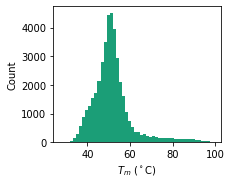

In [53]:
plot_ogt('../../data/tm_Jarzab/cleaned_enzyme_tms_jarzab_v1.fasta',
         outname='../../results/figures/tm_Jarzab_distribution.png')